In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\user\Downloads\USArrests.csv')
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
data.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [4]:
data.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [5]:
x = data[['Murder', 'Assault', 'UrbanPop', 'Rape']]

In [6]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,n_init=10)
    km.fit(x)
    css=km.inertia_
    wcss.append(css)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows wi

In [7]:
wcss

[355807.8216,
 96399.02814449917,
 47964.26535714286,
 34728.629357142854,
 24417.023523809523,
 18768.000666666667,
 16132.07525,
 13285.61692063492,
 11125.03380952381,
 10147.609119047618]

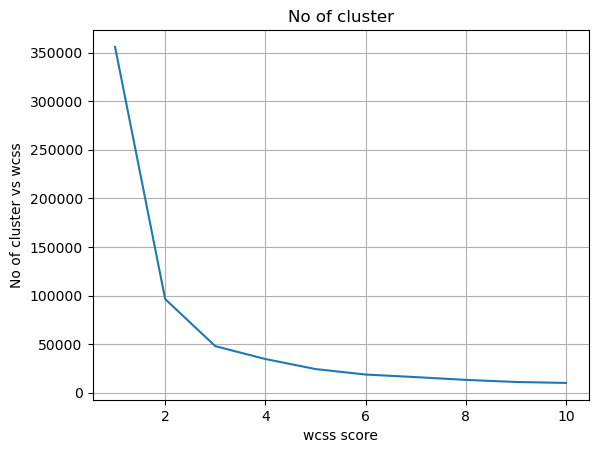

In [8]:
plt.plot(range(1,11),wcss)
plt.title('No of cluster')
plt.xlabel('wcss score')
plt.ylabel('No of cluster vs wcss')
plt.grid()
plt.show()

In [9]:
Km = KMeans(n_clusters=3,n_init=10)

In [10]:
km.fit(x)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=10, n_init=10)

In [12]:
cluster_labels=km.predict(x)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

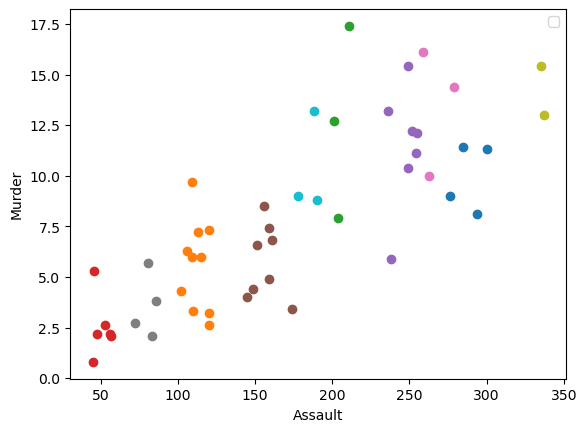

In [20]:
colors = ['r','g','b']
for i in range(max(cluster_labels)+1):
    cluster_data=x[cluster_labels==i]
    plt.scatter(cluster_data['Assault'],
                cluster_data['Murder'])
                
    plt.xlabel('Assault')
    plt.ylabel('Murder')
    plt.legend()

In [21]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [22]:
merging = linkage(x,method="ward")

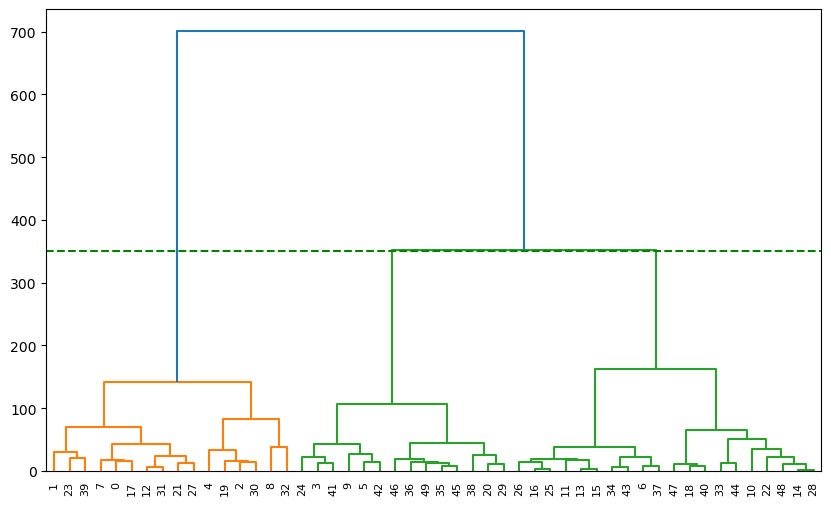

In [23]:
plt.figure(figsize=(10,6))
dendrogram(merging)
plt.axhline(350,color="green",linestyle='--')
plt.show()

In [24]:
cluster_lables = fcluster(merging,350,criterion="distance")

In [25]:
cluster_lables

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 2, 1,
       3, 1, 2, 3, 3, 1, 3, 2, 1, 1, 1, 3, 3, 2, 2, 3, 2, 1, 3, 2, 2, 3,
       3, 2, 2, 3, 3, 2], dtype=int32)

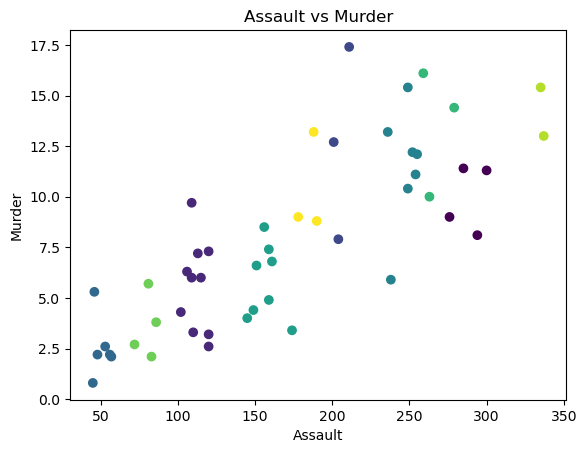

In [27]:
plt.scatter(x['Assault'],x['Murder'],c=cluster_labels)
plt.xlabel('Assault')
plt.ylabel('Murder')
plt.title('Assault vs Murder')
plt.show()